In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi

columns = ['Hop','Country of Origin', 'Use', 'Citrus', 'Tropical Fruit', 'Stone Fruit', 'Berry',
           'Floral','Grassy', 'Herbal', 'Spice', 'Pine/Resin']
#Hop Flavors Import
hop_data = pd.read_csv(r'/Users/williamcasterlin/Desktop/Python Brewing/Hop_Flavors.csv')

#Choose Hop Function
def choose_hop(hop):
    hop = str(hop)
    this_hop = hop_data[hop_data['Hop'].str.match(hop)]
    return this_hop

#Choose Hops
hops = ['Astra', 'Boadica', 'Defender', 'Aramis', 'Aquilla']

#Build Hop DataFrame
hop_list = pd.DataFrame(columns = columns)
hop_list = hop_list.append(choose_hop(hops[0]))
hop_list = hop_list.append(choose_hop(hops[1]))
hop_list = hop_list.append(choose_hop(hops[2]))
hop_list = hop_list.append(choose_hop(hops[3]))
hop_list2 = hop_list
hop_list = hop_list.append(choose_hop(hops[4]))

hop_list = hop_list.drop(columns = ['Use', 'Country of Origin'], axis = 1)
hop_list = hop_list.reset_index(drop = True)
hop_list2 = hop_list2.drop(columns = ['Use', 'Country of Origin'], axis = 1)
hop_list2 = hop_list2.reset_index(drop = True)

hop_list.head()

,Hop,Citrus,Tropical Fruit,Stone Fruit,Berry,Floral,Grassy,Herbal,Spice,Pine/Resin
0,Astra,3,3,3,2,0,1,0,2,1
1,Boadica,0,0,0,2,2,0,2,4,0
2,Defender,0,0,0,0,0,0,0,0,0
3,Aramis,1,0,0,0,0,0,3,3,0
4,Aquilla,0,0,0,0,0,0,0,0,0


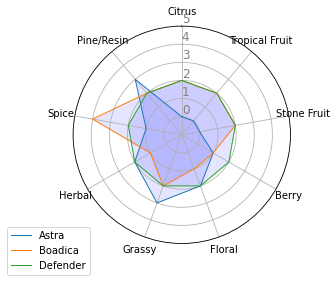

In [205]:

# Variable category
categories = list(hop_list)[1:]

# Number of variable categories
N = len(categories)

# Set the angle value of each point
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
# Initialize the polar coordinate grid
ax = plt.subplot(111, polar=True)


# Set angle offset
ax.set_theta_offset(pi / 2)
# Set clockwise or counterclockwise, 1 or -1
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels
# Set the label of the x axis
plt.xticks(angles[:-1], categories)

# Draw ylabels
# Draw tags
ax.set_rlabel_position(0)
plt.yticks([0, 1, 2, 3, 4, 5], ['0',"1", "2", "3", "4", "5"], color="grey", size=12)
plt.ylim(-1, 5)

#Hop 1
values = hop_list.loc[0].drop('Hop').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=hops[0])
ax.fill(angles, values, 'b', alpha=0.1)

#Hop 2
values = hop_list.loc[1].drop('Hop').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=hops[1])
ax.fill(angles, values, 'b', alpha=0.1)

#Hop 3
values = hop_list.loc[2].drop('Hop').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=hops[2])
ax.fill(angles, values, 'b', alpha=0.1)

#Hop 4
values = hop_list.loc[3].drop('Hop').values.flatten().tolist()
values += values[:1]
#ax.plot(angles, values, linewidth=1, linestyle='solid', label=hop_list.Hop[3])
#ax.fill(angles, values, 'b', alpha=0.1)

#Hop 5
values = hop_list.loc[4].drop('Hop').values.flatten().tolist()
values += values[:1]
#ax.plot(angles, values, linewidth=1, linestyle='solid', label=hop_list.Hop[4])
#ax.fill(angles, values, 'b', alpha=0.1)

#Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


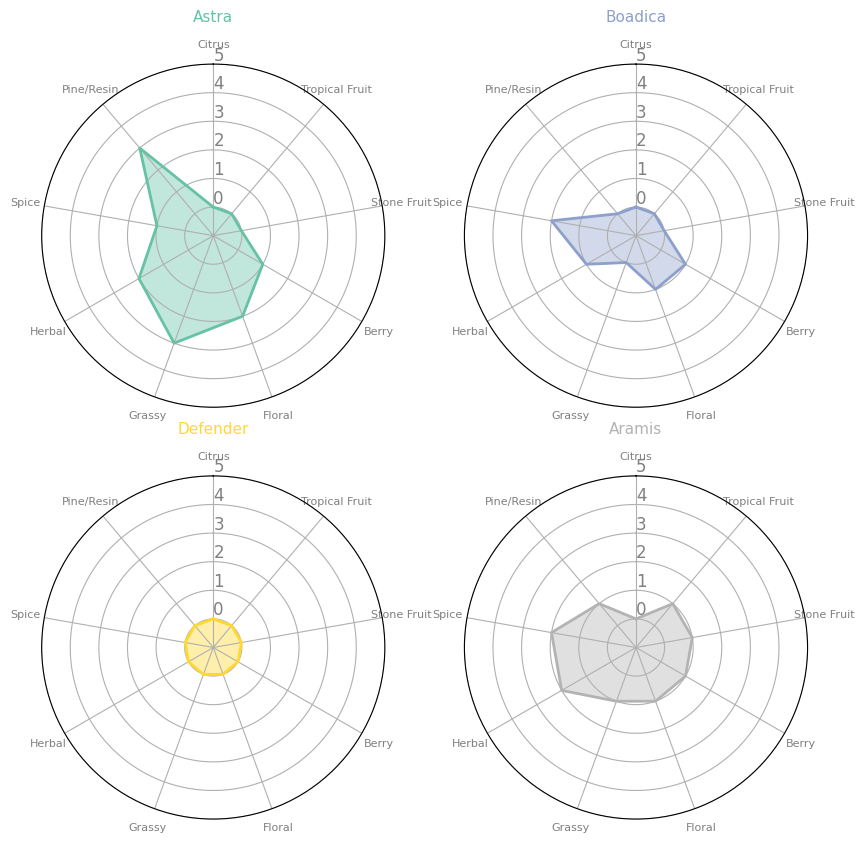

In [209]:
def make_spider( row, title, color):

    # number of variable
    # Variable category
    categories = list(hop_list2)[1:]
    # Number of variable categories
    N = len(categories)
    
    # Set the angle value of each point
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the spider plot
    # Sub-picture
    ax = plt.subplot(2,2,row+1, polar=True, )
    
    # If you want the first axis to be on top:
    # Set angle offset
    ax.set_theta_offset(pi / 2)
    # Set clockwise or counterclockwise, 1 or -1
    ax.set_theta_direction(-1)
    
    # Draw one axe per variable + add labels labels yet
    # Set the label of the x axis
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    
    # Draw ylabels
    # Draw tags
    ax.set_rlabel_position(0)
    plt.yticks([0, 1, 2, 3, 4, 5], ['0',"1", "2", "3", "4", "5"], color="grey", size=12)
    plt.ylim(-1, 5)
    
    # Ind
    # Data input
    values=hop_list2.loc[row].drop('Hop').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    # Add a title
    # Set title
    plt.title(title, size=11, color=color, y=1.1)

# ---------- Step 2 Draw graphics
my_dpi=100
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

# Create a color palette:
# Set color
my_palette = plt.cm.get_cmap("Set2", len(hop_list2.index))


# Loop to plot
for row in range(0, len(hop_list2.index)):
    make_spider( row=row, title=hop_list2['Hop'][row], color=my_palette(row))